#1. Installing Libraries and extracting Dataset

In [2]:
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI


  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-h2su6pzf
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-h2su6pzf
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp312-cp312-linux_x86_64.whl size=426682 sha256=a996511c6e45466d0416a446ab45de5a4b8f05268a963a7344f2aea904ea4615
  Stored in directory: /tmp/pip-ephem-wheel-cache-ay9rtmkk/wheels/95/e6/c7/8ceda667bca7218619fea052622a0b11a37fb51c28c993fae3
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.10
    Uninstalling pycocotools-2.0.10:
      Successfully uninstalled pycocotools-2.0.10


In [1]:
!pip install pycocotools

In [3]:
!pip install --upgrade scikit-image scipy

In [4]:
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import seaborn as sns
import numpy as np

from random import shuffle
from PIL import Image

from pycocotools.coco import COCO

#2. Extracting Dataset

In [5]:
# Load COCO annotation file (you can also use the test file)
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip -q annotations_trainval2017.zip -d /content/drive/MyDrive/COCO_dataset/annotations

# Initialize COCO API for instance annotations
annFile = '/content/drive/MyDrive/COCO_dataset/annotations/annotations/instances_train2017.json'
coco = COCO(annFile)

--2025-11-02 21:46:58--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 16.15.207.32, 52.217.236.33, 52.217.121.89, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|16.15.207.32|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  16.8MB/s    in 16s     

2025-11-02 21:47:15 (14.7 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

replace /content/drive/MyDrive/COCO_dataset/annotations/annotations/instances_train2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
y
y
replace /content/drive/MyDrive/COCO_dataset/annotations/annotations/instances_val2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace /content/drive/MyDrive/COCO_dataset/annotations/annotations/captions_train2017.json? [y]es, [n]o, [A]ll, [N]one, [r]en

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


I have added a cell to mount your Google Drive. Please run it and authorize Colab to access your Drive.

Now, I will modify the code in cell `E7SYS1ZFrFoo` to extract the annotations to `/content/drive/MyDrive/COCO_dataset/annotations` and update the `annFile` variable to reflect this path.

Here is the code to load COCO annotations and display the categories.

**Important:** The `annotation_path` variable needs to be set to the actual path of your COCO annotation file.

In [7]:
import pandas as pd

In [9]:
ANNOT_URL = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"
ANNOT_DIR = "./annotations"
ANNOT_FILE = f"{ANNOT_DIR}/annotations/instances_train2017.json"

if not os.path.exists(ANNOT_FILE):
    !wget -q $ANNOT_URL -O annotations.zip
    !unzip -q annotations.zip -d $ANNOT_DIR

# --- Step 4: Initialize COCO API ---
coco = COCO(ANNOT_FILE)

# --- Step 5: Get all categories ---
cat_ids = coco.getCatIds()
cats = coco.loadCats(cat_ids)

# --- Step 6: For each category, count how many images belong to it ---
category_counts = []
for cat in cats:
    img_ids = coco.getImgIds(catIds=[cat['id']])
    category_counts.append({
        'Category': cat['name'],
        'Supercategory': cat['supercategory'],
        'Num_Images': len(img_ids)
    })

# --- Step 7: Display in tabular format ---
df = pd.DataFrame(category_counts).sort_values(by='Num_Images', ascending=False).reset_index(drop=True)

# Set Pandas display options to ensure tabular view
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# --- Step 8: Display nicely ---
from IPython.display import display
display(df.style.set_properties(**{'text-align': 'center'}))

# Optional: quick summary
print(f"\nTotal Categories: {len(df)}")
unique_imgs = len(set(sum([coco.getImgIds(catIds=[c['id']]) for c in cats], [])))
print(f"Total Unique Images (approx, may overlap): {unique_imgs}")

loading annotations into memory...
Done (t=13.05s)
creating index...
index created!


,Category,Supercategory,Num_Images
0,person,person,64115
1,chair,furniture,12774
2,car,vehicle,12251
3,dining table,furniture,11837
4,cup,kitchen,9189
5,bottle,kitchen,8501
6,bowl,kitchen,7111
7,handbag,accessory,6841
8,truck,vehicle,6127
9,bench,outdoor,5570



Total Categories: 80
Total Unique Images (approx, may overlap): 117266


In [15]:
from pycocotools.coco import COCO
import pandas as pd
import requests

# Load captions annotation file
!wget -q http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip -q annotations_trainval2017.zip -d ./annotations

annFile = './annotations/annotations/captions_train2017.json'
coco_caps = COCO(annFile)

# Get image-caption pairs (limit to 2000 for now)
anns = coco_caps.loadAnns(coco_caps.getAnnIds())[:2000]
data = []
for a in anns:
    img = coco_caps.loadImgs(a['image_id'])[0]
    data.append({
        "image_url": img['coco_url'],
        "caption": a['caption']
    })

df = pd.DataFrame(data)
df.head()


replace ./annotations/annotations/instances_train2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
y
y
y
y
replace ./annotations/annotations/instances_val2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace ./annotations/annotations/captions_train2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace ./annotations/annotations/captions_val2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./annotations/annotations/person_keypoints_train2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
y
replace ./annotations/annotations/person_keypoints_val2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: loading annotations into memory...
Done (t=0.94s)
creating index...
index created!


,image_url,caption
0,http://images.cocodataset.org/train2017/000000...,A bicycle replica with a clock as the front wh...
1,http://images.cocodataset.org/train2017/000000...,A room with blue walls and a white sink and door.
2,http://images.cocodataset.org/train2017/000000...,A car that seems to be parked illegally behind...
3,http://images.cocodataset.org/train2017/000000...,A large passenger airplane flying through the ...
4,http://images.cocodataset.org/train2017/000000...,There is a GOL plane taking off in a partly cl...


#3. Model Pipeline

In [17]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

y
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 5.1 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-czj8hc2p
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-czj8hc2p
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=a1fceedc761778ebd46f86afde4c822502429af44a10bcbc76b465291f618efb
  Stored in directory: /tmp/pip-ephem-wheel-cache-5oh4dag7/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip


In [18]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

text_inputs = torch.cat([clip.tokenize(df['caption'].iloc[i]) for i in range(5)]).to(device)
with torch.no_grad():
    text_features = model.encode_text(text_inputs)
print("Embedding shape:", text_features.shape)


 21%|████████▎                              | 71.5M/338M [00:00<00:00, 344MiB/s]/usr/local/lib/python3.12/dist-packages/diffusers/configuration_utils.py:140: FutureWarning: Accessing config attribute `__iter__` directly via 'StableDiffusionPipeline' object attribute is deprecated. Please access '__iter__' over 'StableDiffusionPipeline's config object instead, e.g. 'scheduler.config.__iter__'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)
100%|███████████████████████████████████████| 338M/338M [00:07<00:00, 45.6MiB/s]


Embedding shape: torch.Size([5, 512])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.1 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!



Prompt → A cozy modern kitchen of size 10x12 ft, decorated with dining table, refrigerator, microwave, plant, realistic lighting, 4K interior render


  0%|          | 0/30 [00:00<?, ?it/s]

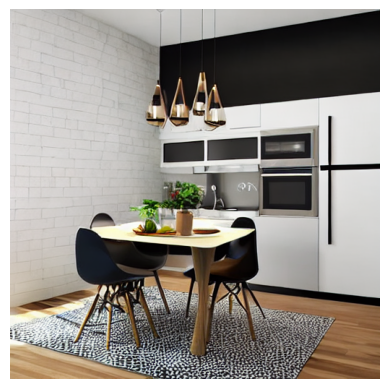

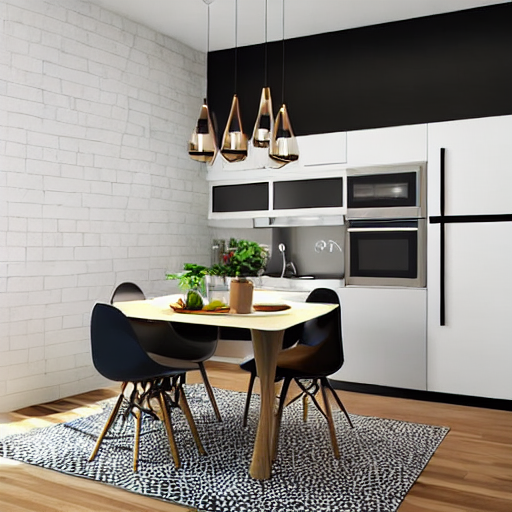

In [10]:
# --- STEP 1: Install Dependencies ---
!pip install -q diffusers==0.31.0 transformers accelerate torch torchvision safetensors

# --- STEP 2: Imports ---
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt

# --- STEP 3: Load Pretrained Stable Diffusion Model ---
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# --- STEP 4: Function to Generate Room Image ---
def generate_room(room_type, size, objects_list, style="modern"):
    prompt = f"A {style} {room_type} of size {size}, decorated with {', '.join(objects_list)}, realistic lighting, 4K interior render"
    print(f"\nPrompt → {prompt}")
    image = pipe(prompt, num_inference_steps=30, guidance_scale=8.5).images[0]
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    return image

# --- STEP 5: Example Run ---
generate_room(
    room_type="kitchen",
    size="10x12 ft",
    objects_list=["dining table", "refrigerator", "microwave", "plant"],
    style="cozy modern"
)


In [11]:
# --- Step 1: Install dependencies (run once per session) ---
!pip install -q diffusers transformers accelerate safetensors torch torchvision

# --- Step 2: Import and load model ---
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to("cuda")

# --- Step 3: Custom user prompt ---
prompt = input("Enter your prompt (e.g., 'A cozy 12x10 kitchen with fridge and plants'): ")

# --- Step 4: Generate and display ---
image = pipe(prompt, guidance_scale=7.5, num_inference_steps=30).images[0]
image.show()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Enter your prompt (e.g., 'A cozy 12x10 kitchen with fridge and plants'): gaming room


  0%|          | 0/30 [00:00<?, ?it/s]

Enter base idea (e.g., 'modern kitchen'): gaming room
Final prompt: A gaming room with refrigerator, dining table, lamp, 4K photo


  0%|          | 0/30 [00:00<?, ?it/s]

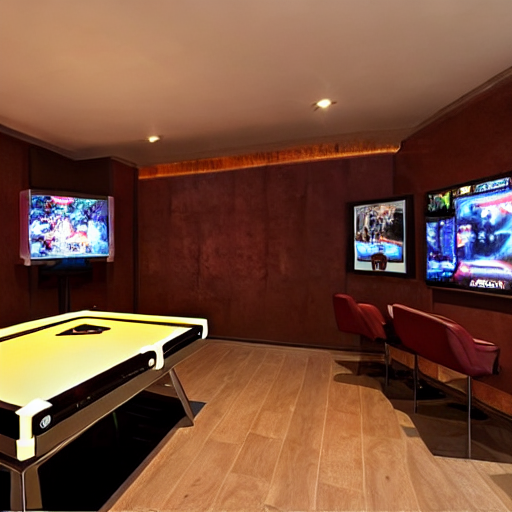

In [12]:
base_prompt = input("Enter base idea (e.g., 'modern kitchen'): ")
categories = ["refrigerator", "dining table", "lamp"]
prompt = f"A {base_prompt} with {', '.join(categories)}, 4K photo"
print("Final prompt:", prompt)

image = pipe(prompt, guidance_scale=7.5, num_inference_steps=30).images[0]
from IPython.display import display
display(image)


In [13]:
import gradio as gr

def generate(prompt):
    image = pipe(prompt, guidance_scale=7.5, num_inference_steps=30).images[0]
    return image

gr.Interface(
    fn=generate,
    inputs=gr.Textbox(label="Describe your room"),
    outputs="image",
    title="Room Decor Generator"
).launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0243f3d4d72e81e29f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#4. Git Repository Setup

In [24]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
!mkdir -p /content/drive/MyDrive/generative-ai-room-decorator/{data/raw,notebooks,src,outputs,configs}

In [22]:
!touch generative-ai-room-decorator/{README.md,.gitignore}

In [26]:
%cd /content/drive/MyDrive/generative-ai-room-decorator


/content/drive/MyDrive/generative-ai-room-decorator


In [ ]:
%cd /content/drive/MyDrive/generative-ai-room-decorator
!git init
!git remote add origin git@github.com:<username>/generative-ai-room-decorator.git


In [28]:
!ssh-keygen -t ed25519 -C "pillalamarri.v@northeastern.edu"

# 2️⃣ Start SSH agent and add key
!eval "$(ssh-agent -s)"
!ssh-add ~/.ssh/id_ed25519

# 3️⃣ Show your public key
!cat ~/.ssh/id_ed25519.pub

Generating public/private ed25519 key pair.
Enter file in which to save the key (/root/.ssh/id_ed25519): 
/root/.ssh/id_ed25519 already exists.
Overwrite (y/n)? y
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_ed25519
Your public key has been saved in /root/.ssh/id_ed25519.pub
The key fingerprint is:
SHA256:U+4exe0uUs32Nwt6ShBT7gD5s9u4VCxXmrAfWlhzL0A pillalamarri.v@northeastern.edu
The key's randomart image is:
+--[ED25519 256]--+
|       ..  E     |
|       .. +      |
|        .=.= o   |
|         =@.B..  |
|        S=+Xo+.. |
|         +O.o.=  |
|         o*+ o.. |
|        .+oooo..o|
|         .o+o...+|
+----[SHA256]-----+
Agent pid 15858
Could not open a connection to your authentication agent.
ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIAKHVViFCOGFpwnqG9k8n9gcJpHYhQ7/Onij450aJaWV pillalamarri.v@northeastern.edu


In [29]:
!eval "$(ssh-agent -s)"    # start SSH agent
!ssh-add ~/.ssh/id_ed25519 # add your SSH key to the agent


Agent pid 16634
Could not open a connection to your authentication agent.


In [30]:
!ssh -T git@github.com


Host key verification failed.


In [33]:
# === START: SSH Agent and Key Setup ===

# Start SSH agent and add key in one shell session
!eval "$(ssh-agent -s)"
!ssh-add ~/.ssh/id_ed25519

# Add GitHub to known_hosts (avoids "host key verification failed")
!mkdir -p ~/.ssh
!ssh-keyscan github.com >> ~/.ssh/known_hosts

# Set correct permissions
!chmod 700 ~/.ssh
!chmod 644 ~/.ssh/known_hosts

# Test SSH connection
!ssh -T git@github.com
# === END ===


Agent pid 17900
Could not open a connection to your authentication agent.
# github.com:22 SSH-2.0-b9026e4
# github.com:22 SSH-2.0-b9026e4
# github.com:22 SSH-2.0-b9026e4
# github.com:22 SSH-2.0-b9026e4
# github.com:22 SSH-2.0-b9026e4
Hi PVRPratyusha! You've successfully authenticated, but GitHub does not provide shell access.


In [37]:
!git remote -v


origin	git@github.com:PVRPratyusha/generative-ai-room-decorator.git (fetch)
origin	git@github.com:PVRPratyusha/generative-ai-room-decorator.git (push)


In [54]:
%cd /content/drive/MyDrive/generative-ai-room-decorator


/content/drive/MyDrive/generative-ai-room-decorator


In [55]:
!git rebase --abort


fatal: No rebase in progress?


In [56]:
!git status
!git branch


On branch main
nothing to commit, working tree clean
* main


In [57]:
!git switch -C main


Reset branch 'main'


In [58]:
!git remote remove origin
!git remote add origin git@github.com:PVRPratyusha/generative-ai-room-decorator.git
!git fetch origin


From github.com:PVRPratyusha/generative-ai-room-decorator
 * [new branch]      main       -> origin/main


In [59]:
!git add .
!git commit -m "Clean branch reset after rebase issue"
!git push origin main --force


On branch main
nothing to commit, working tree clean
Enumerating objects: 12, done.
Counting objects: 100% (12/12), done.
Delta compression using up to 2 threads
Compressing objects: 100% (9/9), done.
Writing objects: 100% (12/12), 1.11 MiB | 8.06 MiB/s, done.
Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), done.
To github.com:PVRPratyusha/generative-ai-room-decorator.git
 + 05965f1...e9923c0 main -> main (forced update)


In [60]:
!echo ".ipynb_checkpoints/" >> .gitignore
!git add .gitignore
!git commit -m "Ignore Colab checkpoint files"
!git push origin main


[main fbaed99] Ignore Colab checkpoint files
 1 file changed, 1 insertion(+)
 create mode 100644 .gitignore
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (2/2), done.
Writing objects: 100% (3/3), 330 bytes | 33.00 KiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To github.com:PVRPratyusha/generative-ai-room-decorator.git
   e9923c0..fbaed99  main -> main


In [61]:
%cd /content/drive/MyDrive/generative-ai-room-decorator/notebooks
!cp Generative_Project_Milestone_1.ipynb Generative_Project_Milestone_1_broken_backup.ipynb


/content/drive/MyDrive/generative-ai-room-decorator/notebooks
